In [1]:
import numpy as np

In [2]:
path = "/home/andrea/Desktop/Final/Baseline4/Set/"

In [33]:
files = []
lines = []
workers = 8
allArrivals = [[[] for i in range(10)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
            print(cli)
            work= 0
            for workers in [8,16,32, 64]:
                file = open(path+"rep"+str(rep)+"/MW"+str(mw)+"/Set_C"+str(cli)+"_T1_W"+str(workers)+"_R"+str(rep)+"/interArrivalTime.log")
                ind = 0
                for line in file:
                    if ind != 0 and line != "null\n":
                        allArrivals[work][clients].append(float(line[:-1]))
                    ind += 1
                work += 1
            clients += 1

1
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40
2
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40
3
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40


In [34]:
meanInterArrivals = np.zeros((4, 10))
for i in range(0, 4):
    for j in range(0, 10):
        meanInterArrivals[i][j] = np.mean(allArrivals[i][j])

In [35]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline4/InterarrivalsTimes.txt", "w")

In [36]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]
for j in range(0, len(clients)):
    clients[j] = clients[j] *6

fileOutput.write("Mean Interarrival Time")
for j in range(len(meanResp)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanResp[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanInterArrivals[j][h]/1000000))
fileOutput.close()

In [11]:
files = []
lines = []
allWorkerTimes = [[[] for i in range(10)] for j in range(4)]
allProcessingTimes = [[[] for i in range(10)] for j in range(4)]
allServiceTimes = [[[] for i in range(10)] for j in range(4)]
allWaitingTimes = [[[] for i in range(10)] for j in range(4)]
allResponseTimes = [[[] for i in range(10)] for j in range(4)]
allTotalTimes = [[[] for i in range(10)] for j in range(4)]
for rep in range(1, 4):
    print(rep)
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
            print(cli)
            work= 0
            for workers in [8, 16, 32, 64]:
                file = open(path+"rep"+str(rep)+"/MW"+str(mw)+"/Set_C"+str(cli)+"_T1_W"+str(workers)+"_R"+str(rep)+"/times.log")
                ind = 0
                for line in file:
                    splitted = line.split("\t")
                    if ind != 0 and len(splitted) > 6:
                        #allWaitingTimes[work][clients].append(int(splitted[2]))
                        #allWorkerTimes[work][clients].append(int(splitted[3]))
                        #allProcessingTimes[work][clients].append(int(splitted[4]))
                        allServiceTimes[work][clients].append(int(splitted[5]))
                        allResponseTimes[work][clients].append(int(splitted[6]))
                        allTotalTimes[work][clients].append(int(splitted[-1]))
                    ind += 1
                work += 1
            clients += 1
                


1
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40
2
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40
3
1
4
8
12
16
20
24
28
32
40
1
4
8
12
16
20
24
28
32
40


In [12]:
#...e prendo la media di quei tempi
meanResp = np.zeros((4, 10))
meanWait = np.zeros((4, 10))
meanProc =np.zeros((4, 10))
meanWorker = np.zeros((4, 10))
meanServ = np.zeros((4, 10))
meanTot = np.zeros((4, 10))
for i in range(0, 4):
    for j in range(0, 10):
        #meanProc[i][j] = np.mean(allProcessingTimes[i][j])
        #meanWait[i][j] = np.mean(allWaitingTimes[i][j])
        meanResp[i][j] = np.mean(allResponseTimes[i][j])
        meanServ[i][j] = np.mean(allServiceTimes[i][j])
        #meanWorker[i][j] = np.mean(allWorkerTimes[i][j])
        meanTot[i][j] = np.mean(allTotalTimes[i][j])

In [17]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline4/ServiceTimes.txt", "w")

In [18]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]
for j in range(0, len(clients)):
    clients[j] = clients[j] *6

fileOutput.write("Mean Service Time")
for j in range(len(meanProc)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(meanProc[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(meanServ[j][h]/1000000))
fileOutput.close()

In [35]:
worker = np.zeros((4, 10))
for i in range(0, len(meanProc)):
    for j in range(0, len(meanProc[i])):
        worker[i][j] = meanServ[i][j] - meanProc[i][j]

In [6]:
import matplotlib.pyplot as plt

In [48]:
totClients = []
clients4 = [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]
for i in range(0, len(clients4)):
    clients4[i] = 6*clients4[i]
    totClients.append(clients4[i])
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 45, 60, 85, 110]
for i in range(0, len(clients)):
    clients[i] = 2*clients[i]
    totClients.append(clients[i])
plt.figure(figsize=(27, 20))
'''plt.plot(clients, meanServ[0]/1000000, linewidth=4, marker = "o",  markersize = 10, color="b", label = "8 worker threads")
plt.plot(clients, meanServ[1]/1000000, linewidth=4, marker = "o", markersize = 10, color="r", label = "16 worker threads")
plt.plot(clients, meanServ[2]/1000000, linewidth=4, marker = "o", markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients, meanServ[3]/1000000, linewidth=4, marker = "o", markersize = 10, color="orange", label = "64 worker threads")

plt.plot(clients4, meanServ4[0]/1000000, linewidth=4, marker = "o", markersize = 10, color="b")
plt.plot(clients4, meanServ4[1]/1000000, linewidth=4, marker = "o", markersize = 10, color="r")
plt.plot(clients4, meanServ4[2]/1000000, linewidth=4, marker = "o", markersize = 10, color="g")
plt.plot(clients4, meanServ4[3]/1000000, linewidth=4, marker = "o", markersize = 10, color="orange")
'''
plt.plot(clients4, meanServ[0]/1000000, linewidth=3, markersize = 10, color="r", label = "Service Time")
plt.plot(clients4, meanResp[0]/1000000, linewidth=3, markersize = 10, color="b", label = "Response time")
plt.plot(clients4, meanWait[0]/1000000, linewidth=3, markersize = 10, color="g", label = "Waiting Time")
plt.legend(loc=2, fontsize=35)
plt.title('8 Worker Threads - Service, Waiting and Response Time over number of clients', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Time [msec]", fontsize= 35)
plt.grid(True)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(clients4, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 41.96657996413542)

In [49]:
plt.savefig("/home/andrea/Desktop/Final/Baseline4/times8WorkerThreads.png")

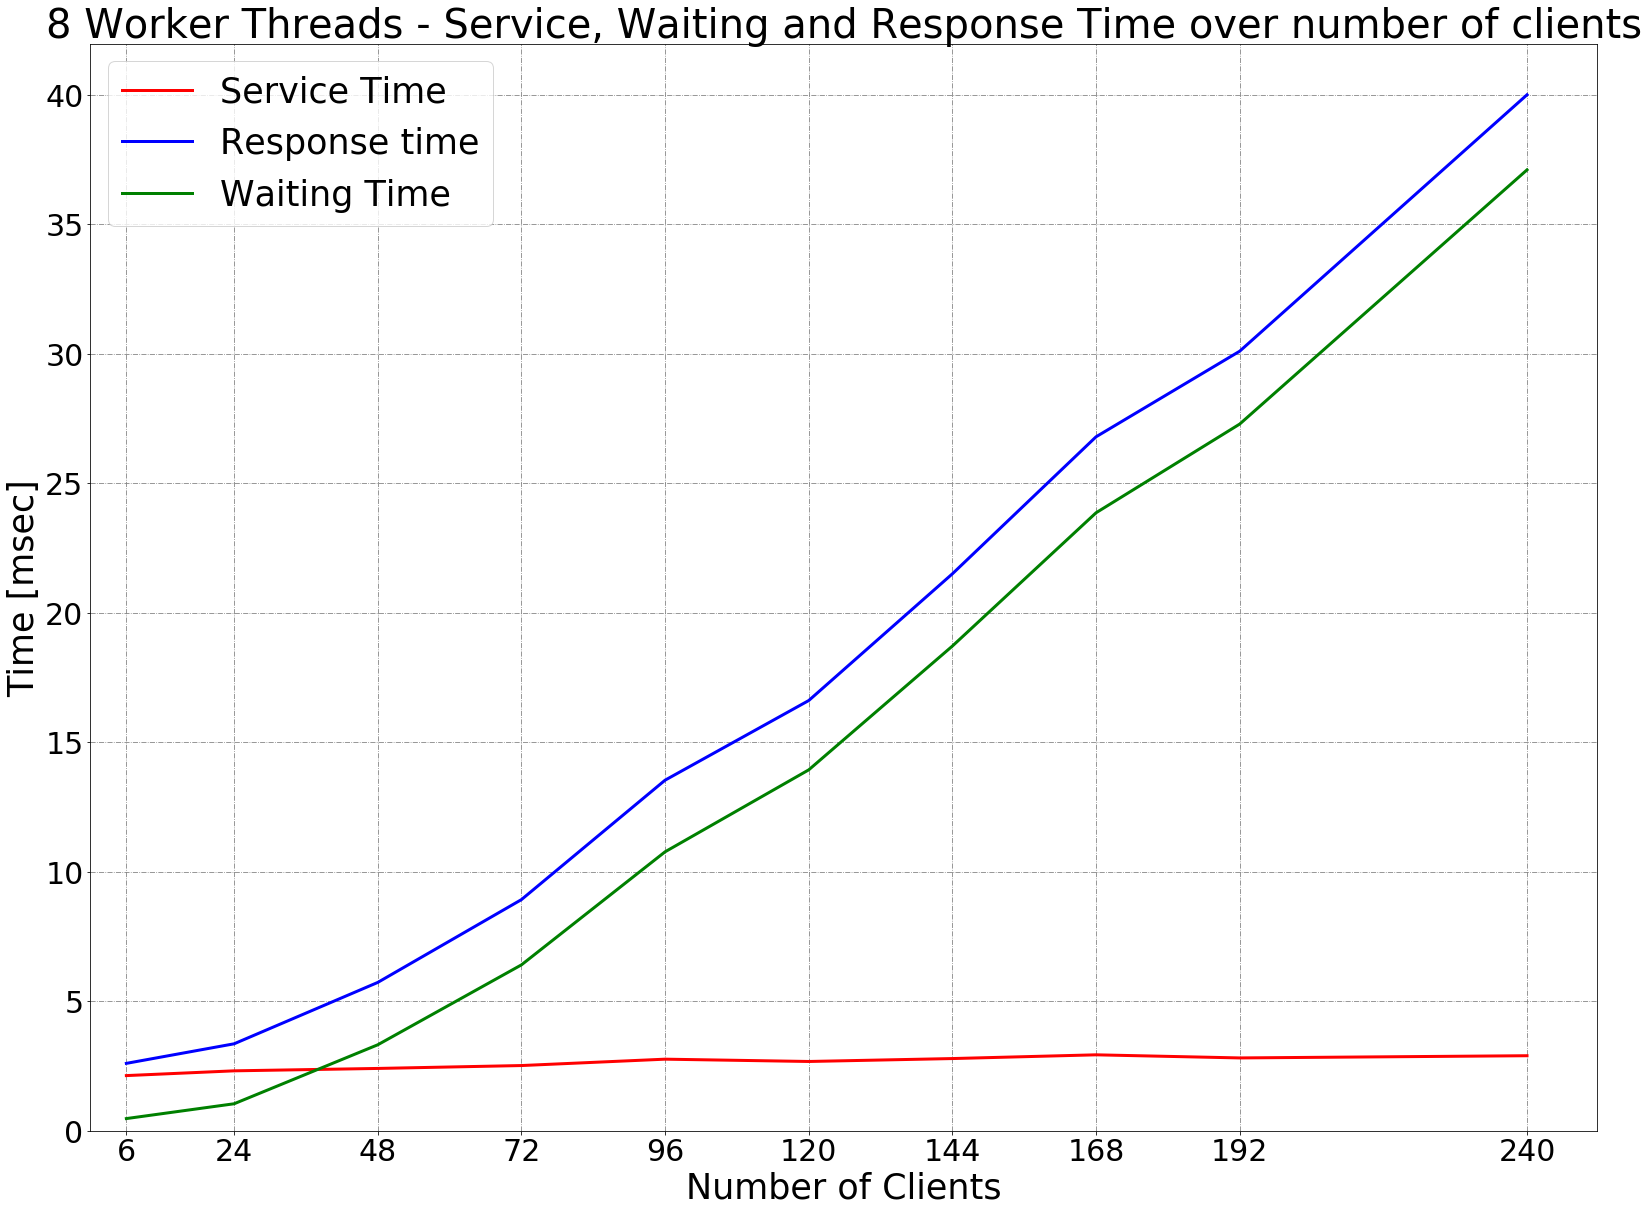

In [47]:
plt.show()

In [19]:
files = []
work = 0
allQueueLengths = np.zeros((4, 10))
for worker in [8, 16, 32, 64]:
    for mw in [4, 5]:
        clients = 0
        for cli in [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]:
            queueRep = np.zeros(3)
            for rep in range(1, 4):
                file = open(path+"rep"+str(rep)+"/MW"+str(mw)+"/Set_C"+str(cli)+"_T1_W"+str(worker)+"_R"+str(rep)+"/QueueLength.log")
                ind = 0
                lines = []
                for line in file:
                    lines.append(line)
                j = 0
                while lines[j] == "0\n":
                    j += 1
                j = j
                p = len(lines)-1
                while lines[p] == "0\n":
                    p -= 1
                p = (len(lines)-p)
                if p == 0:
                    p = 1
                x = np.asarray(lines[j:-p])
                x = x.astype(int)
                queueRep[rep-1] = np.mean(x)
            allQueueLengths[work][clients] += np.mean(queueRep)

            clients += 1

    work += 1

In [20]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline4/QueueLengths.txt", "w")

In [21]:
clients = [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]
for j in range(0, len(clients)):
    clients[j] = clients[j] *6

fileOutput.write("Mean Queue Length")
for j in range(len(allQueueLengths)):
    fileOutput.write("\n\nWorker: " + str(2**(3+j)) + "\n")
    for h in range(0, len(allQueueLengths[0])):         
        fileOutput.write("\n"+str(clients[h])+" Clients: ")
        fileOutput.write(str(allQueueLengths[j][h]))
fileOutput.close()

In [59]:
#plotto la lunghezza delle code
plt.figure(figsize=(27, 20))
clients4 = [1, 4, 8, 12, 16, 20, 24, 28, 32, 40]
for i in range(0, len(clients4)):
    clients4[i] = 6*clients4[i]
    totClients.append(clients4[i])
plt.plot(clients4, allQueueLengths[0], linewidth=3, markersize = 10, color="r", label = "8 worker threads")
plt.plot(clients4, allQueueLengths[1], linewidth=3, markersize = 10, color="C1", label = "16 worker threads")
plt.plot(clients4, allQueueLengths[2], linewidth=3, markersize = 10, color="g", label = "32 worker threads")
plt.plot(clients4, allQueueLengths[3], linewidth=3, markersize = 10, color="b", label = "64 worker threads")
plt.legend(loc=2, fontsize=35)

plt.title('Queue Length', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. number of jobs in the queue", fontsize= 35)
plt.grid(True)
plt.xticks(clients)
plt.rc('grid', linestyle="-.", color ='grey')
plt.xticks(clients4, fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 212.27309235592432)

In [60]:
plt.savefig("/home/andrea/Desktop/Final/Baseline4/queueLength.png")

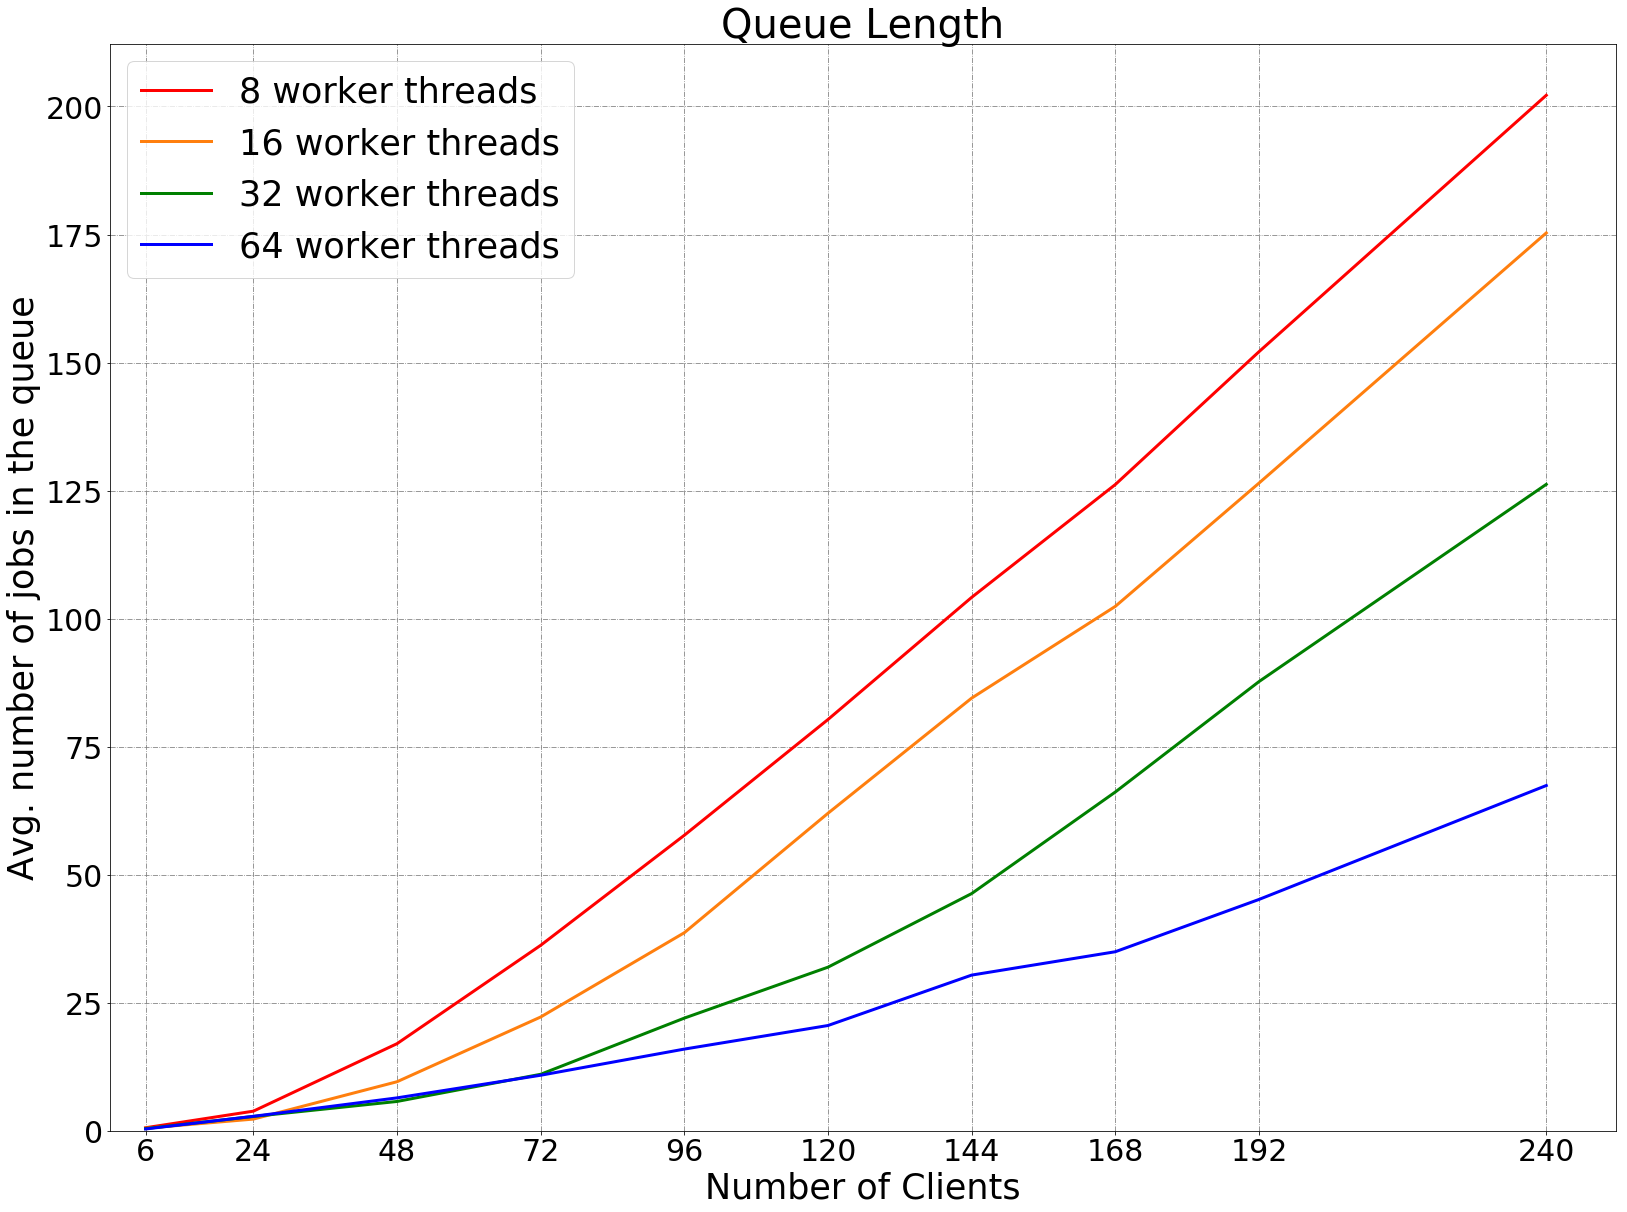

In [58]:
plt.show()

In [121]:
plt.figure(figsize=(20, 15))
width = 1
pos = [5, 10, 15, 20]
pos = np.asarray(pos)
workers = np.asarray([8, 16, 32, 64])
arrayInter = np.zeros((4, 4))
client = -1
for i in range(0, 4):
    arrayInter[0][i] = meanTot[i][client]/1000000
    arrayInter[1][i] = meanServ[i][client]/1000000
    arrayInter[2][i] = meanWait[i][client]/1000000
    arrayInter[3][i] = meanResp[i][client]/1000000
    
plt.title('Saturated (240 clients) - Component Utilization', fontsize= 20)
plt.xlabel("Worker Threads", fontsize= 20)
plt.yticks(fontsize=14)
plt.ylabel("Time [msec]", fontsize= 20)
rect = plt.bar(pos, arrayInter[0], width, color='royalblue',label="Total time in System")
rect2 = plt.bar(pos+width, arrayInter[2], width,  color='forestgreen',label="Waiting Time")
rect3 = plt.bar(pos+2*width, arrayInter[1], width, color='firebrick',label="Service Time")
#rect4 = plt.bar(pos+3*width, arrayInter[3], width,  color='lightsalmon',label="Response Time")

#rect5 = plt.bar(workers+5*width, meanTot[0][-1], width, tick_label=workers, color='lightblue',label="Total")
#rect6 = plt.bar(workers+6*width, meanServS[0][-1], width, tick_label=workers, color='green',label="Serv")
#rect7 = plt.bar(workers+7*width, meanWait[0][-1], width, tick_label=workers, color='salmon',label="Wait")
#rect8 = plt.bar(workers+8*width, meanRespS[0][-1], width, tick_label="Resp", color='C1',label="Resp")

plt.legend(loc=1, fontsize='xx-large')
plt.xticks(pos +width, workers,  fontsize = 14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%.3f' % float(height), ha='center', va='bottom', fontsize=14)

autolabel(rect)
autolabel(rect2)
autolabel(rect3)
#autolabel(rect4)

In [122]:
plt.savefig("/home/andrea/Desktop/Final/Baseline4/componentUtilizationSatur.png")

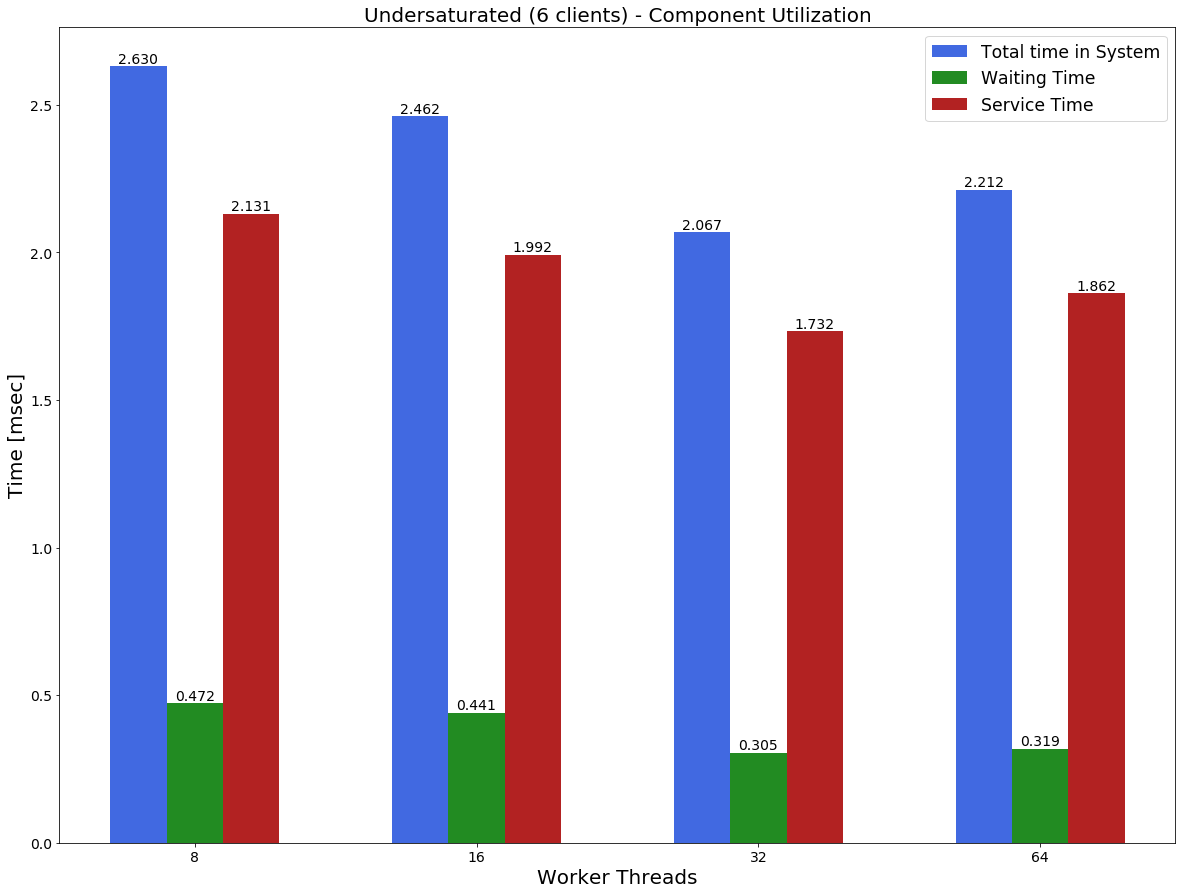

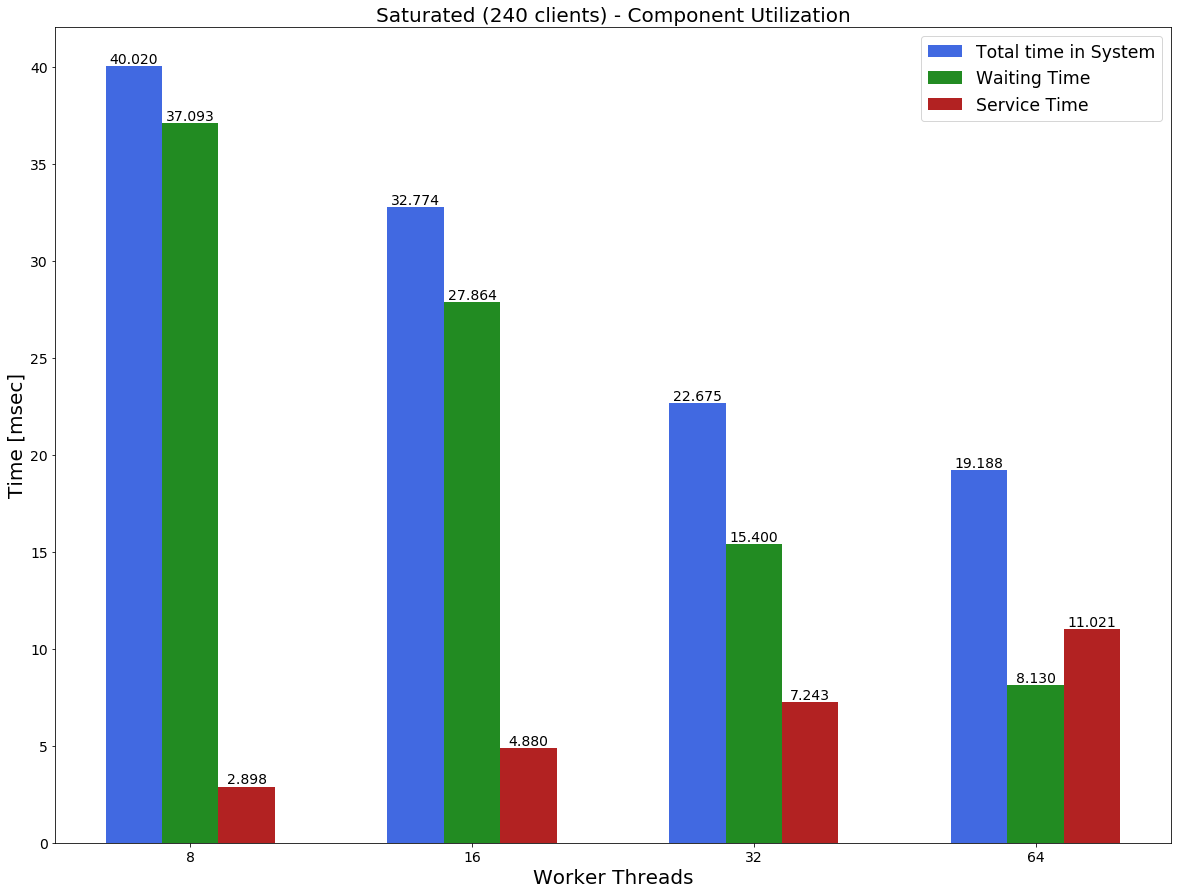

In [120]:
plt.show()